In [65]:
import os
import re
import time
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [66]:
dev_path = '../DSL2122_january_dataset/development.csv'
eva_path = '../DSL2122_january_dataset/evaluation.csv'

In [67]:
dev_ds = pd.read_csv(dev_path, low_memory=True)
ev_ds = pd.read_csv(eva_path, low_memory=False)

In [68]:
dev_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224994 entries, 0 to 224993
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  224994 non-null  int64 
 1   ids        224994 non-null  int64 
 2   date       224994 non-null  object
 3   flag       224994 non-null  object
 4   user       224994 non-null  object
 5   text       224994 non-null  object
dtypes: int64(2), object(4)
memory usage: 10.3+ MB


In [69]:
datasets = [dev_ds, ev_ds]
full_ds = pd.concat(datasets)

mask = full_ds['sentiment'].isna()

In [70]:
print(full_ds[~mask].info(),'\n\n')

print(full_ds.ids[~mask].nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224994 entries, 0 to 224993
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   sentiment  224994 non-null  float64
 1   ids        224994 non-null  int64  
 2   date       224994 non-null  object 
 3   flag       224994 non-null  object 
 4   user       224994 non-null  object 
 5   text       224994 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 12.0+ MB
None 


224716


we can observe that for the dev dataset, the ids feature are almost all unique values for all the records:

224716 different values over 224994 records. are identifiers then we drop them


In [71]:
print(full_ds[mask].info(),'\n\n')

print(full_ds.ids[mask].nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74999 entries, 0 to 74998
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sentiment  0 non-null      float64
 1   ids        74999 non-null  int64  
 2   date       74999 non-null  object 
 3   flag       74999 non-null  object 
 4   user       74999 non-null  object 
 5   text       74999 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.0+ MB
None 


74977


we are observing the same behavior for eval dataset


In [72]:
ev_usrs = ev_ds.user.unique()
dev_usrs = dev_ds.user.unique()

print(f'eval_users len: {len(ev_usrs)}\ndev_users len: {len(dev_usrs)}\n')
intersection = set(dev_usrs).intersection(ev_usrs)
print(f'intersection between two set of users have lenght: {len(intersection)}')

eval_users len: 10647
dev_users len: 10647

intersection between two set of users have lenght: 10647


we can assume the same users are present in both dataset

In [73]:
dev_ds.flag.unique()


array(['NO_QUERY'], dtype=object)

flag feature is the same NO_QUERY for all the records. no relevant information, so we can drop as well


In [74]:
full_ds.drop(columns=['ids', 'flag'], inplace=True)
full_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299993 entries, 0 to 74998
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   sentiment  224994 non-null  float64
 1   date       299993 non-null  object 
 2   user       299993 non-null  object 
 3   text       299993 non-null  object 
dtypes: float64(1), object(3)
memory usage: 11.4+ MB


# DATE PREPROCESSING

In [75]:
'''
Hours of day coresponding to the part of the day

morning [5 - 12] -> 0.2
afternoon [13 - 18] -> 0.4
evening [19 - 22] -> 0.6
night [23 - 5] -> 0.8
'''

def hourToPartOfDay(hour):
    if hour < 4:
        return 0.8
    elif hour < 12:
        return 0.2
    elif hour < 18:
        return 0.4
    elif hour < 23:
        return 0.6
    else:
        return 0.8

full_ds['date'] = pd.to_datetime(full_ds['date'])
full_ds['month'] = pd.DatetimeIndex(full_ds['date']).month
full_ds['day'] = pd.DatetimeIndex(full_ds['date']).day
full_ds['hour'] = pd.DatetimeIndex(full_ds['date']).hour


full_ds['part_of_day'] = full_ds.hour.apply(lambda x: hourToPartOfDay(x))

C:\Users\Ooweey\AppData\Roaming\Python\Python39\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [76]:
full_ds.drop(columns=['date'], inplace=True)


In [77]:
full_ds.user.nunique()

10647

In [78]:
prob_positive = dev_ds.groupby(['user'])['sentiment']

In [79]:
# list(prob_positive)


# tries


In [80]:
# prob_pos = dev_ds.groupby(['user'])['sentiment'].mean()
# prob_pos = pd.DataFrame(prob_pos)
#

In [81]:
# prob_pos['neg'] = 1 - prob_pos['sentiment']
#
#

In [82]:
# prob_pos['ratio'] = prob_pos['sentiment']/prob_pos['neg']
#
#

In [83]:
# # removing infinite values
# ratio = list(prob_pos.ratio)
# #ratio.sort(reverse=True)
#
# print(Counter(ratio))
# prob_pos['ratio'] = prob_pos.ratio.map(lambda x: 85 if x == np.inf else x )
#

In [84]:
# enc_prob_ratio = prob_pos.ratio.to_dict()
#

In [85]:
# dev_ds['encoded_usr'] = dev_ds['user'].map(enc_prob_ratio)
#

In [86]:
# dev_ds.encoded_usr.head(10)

In [87]:

def encode_users(df):
    probs = pd.DataFrame(df.groupby(['user'])['sentiment'].mean())

    # creating ratio between neg and pos
    probs['neg'] = 1 - probs['sentiment']
    probs['ratio'] = probs['sentiment'] / probs['neg']

    # removing infinite values
    probs['ratio'] = probs.ratio.map(lambda x: 80 if x == np.inf else x )

    enc_prob_ratio = probs.ratio.to_dict()

    df['encoded_usr'] = dev_ds['user'].map(enc_prob_ratio)

    return df

In [88]:
full_ds = encode_users(full_ds)

# text processing

In [89]:
# cleaning text

remove_tag = lambda x: re.sub(r'[@]\w+[a-zA-Z0-9] ', '',x)
remove_punct = lambda x: re.sub(r'[^\w\s]', '', x)
remove_links = lambda x: re.sub(r'http\w+[a-zA-Z0-9] ', '', x)
remove_strange_chars = lambda x: x.encode("ascii", "ignore").decode()

full_ds['cl_text'] = full_ds.text.map(remove_tag)\
                                    .map(remove_punct)\
                                    .map(remove_links)\
                                    .map(remove_strange_chars)\
                                    .apply(str.lower)

In [90]:
# tokenizing the tweet

tokenize =  lambda x: re.split('\W+', x)

full_ds['tokenized'] = full_ds.cl_text.map(tokenize)

most of the tweets contains a last empty char, cleaning again

In [91]:
def clean_tokenized(text): # change name
    text = [w for w in text if len(w) > 1]
    return text
full_ds['tokenized'] = full_ds['tokenized'].apply(lambda x: clean_tokenized(x))

In [92]:
stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    if len(text) < 4: return text
    text = [word for word in text if word not in stopword]
    return text

full_ds['no_stop_words'] = full_ds.tokenized.apply(lambda x: remove_stopwords(x))

full_ds['len_tweet'] = full_ds.no_stop_words.apply(len)


In [93]:
# ls = list(full_ds['len_tweet'][mask])
# ls.sort()
# Counter(ls)

In [94]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

full_ds['stemmed'] = full_ds.no_stop_words.apply(lambda x: stemming(x))

In [95]:
#Appliyng Countvectorizer
def dummy(doc):
    return doc

In [96]:
# countVectorizer = CountVectorizer(tokenizer=dummy,
#     preprocessor=dummy, min_df=10)
#
# countVector = countVectorizer.fit_transform(full_ds['stemmed'][~mask])
#
# print(f'{countVector.shape[0]} Number of reviews has {countVector.shape[1]} words')
# #print(countVectorizer.get_feature_names())
#

In [97]:
# count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
# count_vect_df.head()
#

In [98]:
# cv = count_vect_df.sum()
#

In [99]:
# cv = cv.sort_values()
#

In [100]:
# sns.displot(cv[:100])

# WAIT

In [101]:
ds_for_train = full_ds[['sentiment', 'month', 'day', 'part_of_day', 'encoded_usr', 'stemmed']]

In [102]:
data = ds_for_train['stemmed'].str.join(' ')

plt.figure(figsize = (50,50))

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

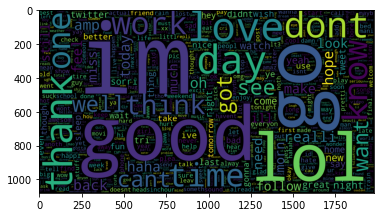

In [103]:
wc = WordCloud(max_words = 1000 , width = 1980 , height = 1080,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)

In [139]:
# wc.words_

In [140]:
tf = TfidfVectorizer(ngram_range=(1,3),
                     min_df=0.001,
                     tokenizer=dummy,
                     preprocessor=dummy)
text_tfidf = tf.fit_transform(ds_for_train['stemmed'][~mask])

In [141]:
df_tfidf = pd.DataFrame(text_tfidf.toarray(), columns=tf.get_feature_names())

In [142]:
df_tfidf.shape

(224994, 1144)

In [133]:
train_df = ds_for_train[~mask].drop(columns=['stemmed'])

In [134]:
train_df.shape

(224994, 5)

In [135]:
train_df = pd.concat([train_df, df_tfidf], axis=1)

In [136]:
train_df.shape

(224994, 9449)

In [110]:
# del data
# del datasets
# del full_ds
# del ds_for_train
# del text_tfidf
# del df_tfidf
# del intersection
# del ev_ds
# del dev_ds
# del dev_usrs
# del ev_usrs
# del prob_positive
# del mask
# del ps
# del stopword
# del tf
# del wc

In [137]:
use = train_df[['month', 'day', 'part_of_day', 'encoded_usr']]
train_df.drop(columns=['month', 'day', 'part_of_day', 'encoded_usr'], inplace=True)

MemoryError: Unable to allocate 15.8 GiB for an array with shape (9447, 224994) and data type float64

In [113]:







# X_train, X_test, y_train, y_test = train_test_split(train_df.drop(columns=['sentiment']),
#                                                     train_df['sentiment'],
#                                                     test_size = 0.2,
#                                                     random_state =26105111)














In [114]:
# # Most Used Words
# count = pd.DataFrame(count_vect_df.sum())
# countdf = count.sort_values(0,ascending=False).head(20)
# countdf[1:11]
#
#

In [115]:
# #Function to ngram
# def get_top_n_gram(corpus,ngram_range):
#     vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english',tokenizer=dummy,
#     preprocessor=dummy).fit(corpus)
#
#     bag_of_words = vec.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0)
#
#     words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
#     words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#
#     return words_freq
#

In [116]:
# #n2_bigram
# n2_bigrams = get_top_n_gram(full_ds['stemmed'],(2,2))
#

In [117]:
# n2_bigrams[:1000]
#

In [118]:
# #+n3_trigram
# n3_trigrams = get_top_n_gram(full_ds['stemmed'],(3,3))
#

In [119]:
# n3_trigrams[:1000]
#

In [120]:

# sum_words = countVector.sum(axis=0)
#
# words_freq = [(word, sum_words[0, idx]) for word, idx in countVectorizer.vocabulary_.items()]
# words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#

In [121]:
# words_freq[:100]